In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
import pandas as pd
pd.options.display.max_rows = 60
pd.options.display.min_rows = None
import matplotlib.pylab as plt
import numpy as np
from collections import Counter
from wordcloud import WordCloud, STOPWORDS



from IPython.display import display, Markdown


In [27]:
 dataset = pd.read_csv("/content/Migration of Monoliths to Microservices Survey - V3 (Responses) - Form Responses 1_2.csv")

In [28]:
dataset[0:2]

,Timestamp,1.1 What areas have you been working on these past 5 years?\nTick all that apply.,"1.2. What is your title? \nE.g., Senior Developer, Architect, Principal Software Engineer, Tester, etc.",1.3. Which country are you working from?,1.4. What is your professional experience in Microservices (in years)?,1.5. How many projects that involved the migration of monoliths to microservices have you been involved in?,1.6. What were the domain areas of these projects?,1.7. Roughly how many monthly active users did these systems serve when the process of migrating to microservices was started?,1.8. Roughly how many people were working on these systems when the process of migrating to microservices was started?,2.1. Where do you look for guidance when migrating a monolith system to microservices?\nTick all that apply,...,"5.2. Which of these techniques do you often use together? Do you use them ""before"", ""after"" or ""as a step of"" each other?","5.3. In your experience, what are the main challenges of applying these techniques?",6.1. What other techniques or patterns have you used in the migration process that were not mentioned in this survey?,"6.2. In your opinion, which are the most important challenges faced in the migration process?\nTick at most 9 options.",7.1. Do you usually evaluate the result of a decomposition? How?,7.2. What quality attributes do you assess when evaluating the decomposition result?\nTick at most 4 options.,7.3. Why?,"7.4. What metrics would you use to evaluate these quality attributes? Why?\nExample: I use the throughput (e.g., requests per second) to measure the efficiency.",7.5. In which environments do you evaluate a decomposition result?\nTick all that apply,7.6. What kind of inputs do you use to evaluate a decomposition result?\nTick all that apply
0,1/4/2023 13:28:23,"Software Development, Software Architecture, O...",Senior Software Engineer,Spain,8,5,"Media, IT services",> 1M,10 – 50,"Internal consulting, Analysis and internal dis...",...,Change Data Ownership & Synchronize Data in Ap...,Migration of data,NaN,"Database migration and data store splitting, D...","Check before/after metrics, such us: uptime, M...","Maintainability, Performance, Efficiency, Scal...",NaN,"Depending on what is the product, it could cha...","Development, Staging, Production","Functional tests, Simulation, Production"
1,1/4/2023 14:04:50,"Software Development, Software Architecture",Staff Engineer,US,10,2,"Real Estate, public safety",10K – 100K,50 – 200,"Conference presentations, Web resources, blogs...",...,NaN,Getting the data ownership right. Sharing sche...,The practice of going back to a monolith after...,"Database migration and data store splitting, C...",In my experience on the two full migrations we...,"Maintainability, Business-related indicators, ...",NaN,This is different for every company. Sometimes...,Production,"Functional tests, Production"


In [29]:
#dataset = dataset.drop(dataset[dataset['1.6. What were the domain areas of these projects?'].str.contains('Finance')].index)

In [30]:
len(dataset.index)

65

In [31]:
import re
def print_horizontal_graph(keys, values, xlim, ylim, xlabel, ylabel, title, percentage=False, white=False):
  fig, ax = plt.subplots()
  # width = 0.8
  ax.set(xlabel='', title='', xlim=(0, xlim))
  x = np.arange(0, len(keys))
  ax.set_yticks(x, labels=[re.sub("(.{55})", "\\1\n", label, 0, re.DOTALL) for label in keys])
  ax.set(ylabel=ylabel, xlabel=xlabel, title=title, ylim=(0, ylim))
  pps = ax.barh(x, values, color ='#8c2d19',align="edge")
  if percentage:
    if white:
      ax.bar_label(pps, padding=-35, color='white',
             fontsize=8, label_type='edge', fmt='%.1f%%',
            fontweight='bold')
    else:
      ax.bar_label(pps, padding=10, color='black',
             fontsize=8, label_type='edge', fmt='%.1f%%',
            fontweight='bold')

  else:
    if white:
      ax.bar_label(pps, padding=-13, color='white',
             fontsize=8, label_type='edge',
            fontweight='bold')
    else:
      ax.bar_label(pps, padding=10, color='black',
             fontsize=8, label_type='edge',
            fontweight='bold')

  plt.show()

In [32]:
def print_vertical_graph(keys, values, xlim, ylim, xlabel, ylabel, title, step, percentage=False):
  fig, ax = plt.subplots()
  width = 0.8
  x = np.arange(len(keys))
  ax.set_xticks(x, labels=keys)
  ax.set_yticks(np.arange(0, max(values)+step, step=step))
  ax.set(ylabel=ylabel, xlabel=xlabel, title=title, ylim=(0,ylim))
  if xlim != None:
    ax.set(xlim=(0, xlim))
  pps = ax.bar(x, ans.values(), width, align='center', color ='#8c2d19')
  if percentage:
    ax.bar_label(pps, padding=10, color='black',
             fontsize=8, label_type='edge', fmt='%.1f%%',
            fontweight='bold')
  else:  ax.bar_label(pps, padding=10, color='black',
             fontsize=8, label_type='edge',
            fontweight='bold')

  plt.show()



In [33]:
def get_split_by_comma(ans, reverse=False):
  new_ans = dict()

  for key, value in ans.items():
    aux = key.split(',')
    aux = [i.strip() for i in aux]
    for i in aux:
      if i.capitalize() in new_ans:
        new_ans[i.capitalize()] = new_ans[i.capitalize()] + value
      else:
        if i != '' and i != '.':
          new_ans[i.capitalize()] = value
  new_ans = sorted(new_ans.items(), key=lambda x:x[1], reverse=reverse)
  new_ans = dict(new_ans)

  return new_ans

#1. Experience and Background

**What areas have you been working on these past 5 years?**

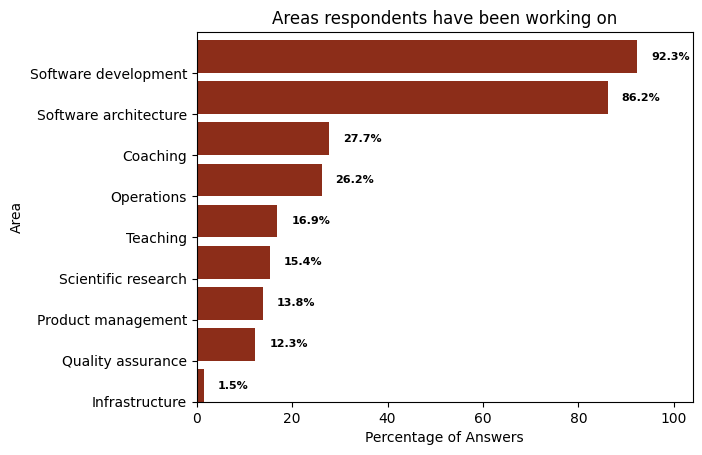

In [34]:
ans = dataset['1.1 What areas have you been working on these past 5 years?\nTick all that apply.'].value_counts().to_dict()
new_ans = get_split_by_comma(ans)
new_ans_values = [(x/65.0)*100 for x in new_ans.values()]
print_horizontal_graph(new_ans.keys(), new_ans_values, 104
                       , 9, 'Percentage of Answers', 'Area', 'Areas respondents have been working on', True)

**What is your title?**

In [35]:
ans = dataset['1.2. What is your title? \nE.g., Senior Developer, Architect, Principal Software Engineer, Tester, etc.'].value_counts().to_dict()
df = pd.DataFrame({'Titles' : ans.keys(), 'N' : ans.values()})
df

,Titles,N
0,Senior Developer,6
1,Architect,4
2,Senior Software Engineer,3
3,Architect,2
4,Software Engineer,2
5,Staff Engineer,2
6,Senior Software Developer,2
7,Senior Developer and Architect,2
8,Senior Software Architect,2
9,Tech lead,1


**Which country are you working from?**

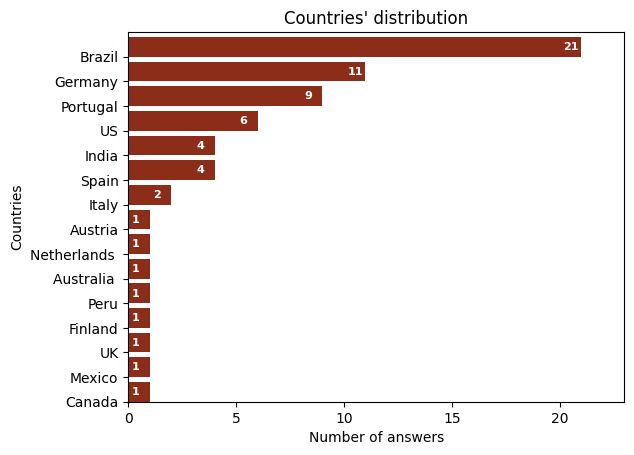

In [36]:
ans = dataset['1.3. Which country are you working from?'].value_counts().to_dict()
ans = dict(sorted(ans.items(), key=lambda item: item[1]))

print_horizontal_graph(ans.keys(), ans.values(), 23, 15, 'Number of answers', 'Countries', 'Countries\' distribution', False, True)

In [37]:
ans = dataset['1.3. Which country are you working from?'].value_counts().to_dict()
df = pd.DataFrame({'Countries' : ans.keys(), 'N' : ans.values()})
df

,Countries,N
0,Brazil,21
1,Germany,11
2,Portugal,9
3,US,6
4,Spain,4
5,India,4
6,Italy,2
7,Canada,1
8,Mexico,1
9,UK,1


**What is your professional experience in Microservices (in years)**

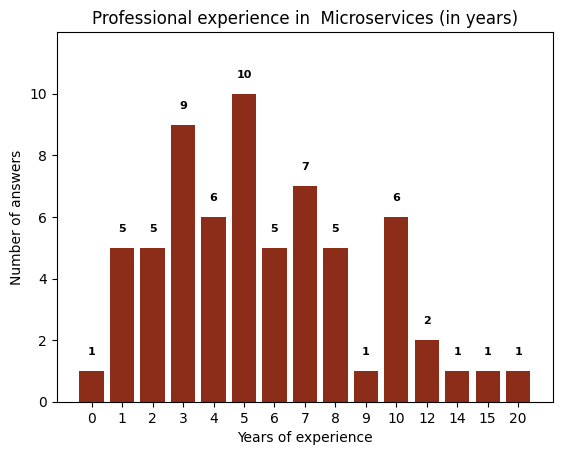

In [38]:
ans = dataset['1.4. What is your professional experience in Microservices (in years)?'].value_counts().to_dict()
ans = dict(sorted(ans.items()))

print_vertical_graph(ans.keys(), ans.values(), None, 12, 'Years of experience', 'Number of answers', 'Professional experience in  Microservices (in years)', 2)

**How many projects that involved the migration of monoliths to microservices have you been involved in?**

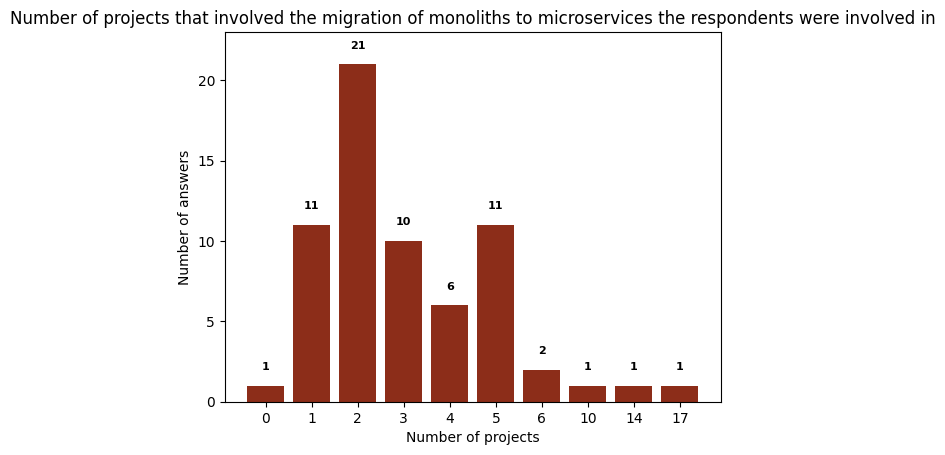

In [39]:
ans = dataset['1.5. How many projects that involved the migration of monoliths to microservices have you been involved in?'].value_counts().to_dict()
ans = dict(sorted(ans.items()))

print_vertical_graph(ans.keys(), ans.values(), None, 23, 'Number of projects', 'Number of answers', 'Number of projects that involved the migration of monoliths to microservices the respondents were involved in', 5)

**What were the domain areas of these projects?**

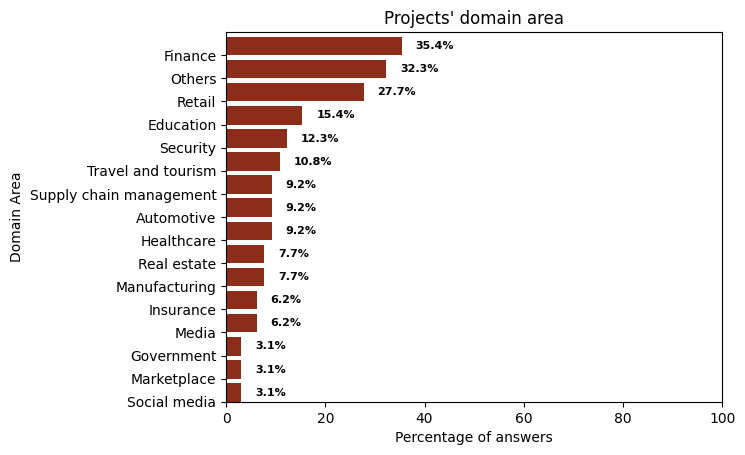

In [40]:
ans = dataset['1.6. What were the domain areas of these projects?'].value_counts().to_dict()
new_ans = get_split_by_comma(ans)

final_ans = dict()
final_ans["Others"] = 0
for key, value in new_ans.items():
  value = value/65*100
  if value <= 1.6:
    final_ans["Others"] = final_ans["Others"] + value
  else:
    final_ans[key] = value

final_ans = dict(sorted(final_ans.items(), key=lambda item: item[1]))

print_horizontal_graph(final_ans.keys(), final_ans.values(), 100 , 16, 'Percentage of answers', 'Domain Area', 'Projects\' domain area', True)


**Roughly how many monthly active users did these systems serve when the process of migrating to microservices was started?**

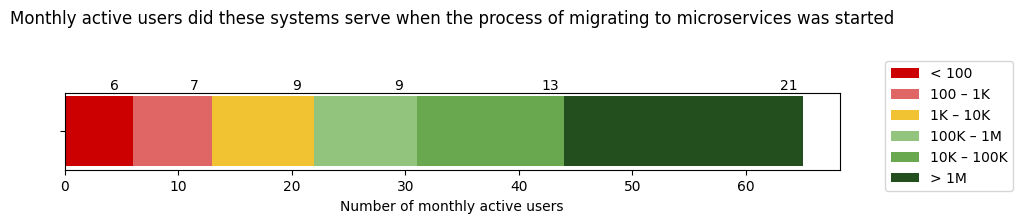

In [59]:
ans = dataset['1.7. Roughly how many monthly active users did these systems serve when the process of migrating to microservices was started?'].value_counts().to_dict()

x =["", "", "", "", "", "", ""]
ans = dict(reversed(list(ans.items())))

y1 = np.array(list(ans.values())[0])
y2 = np.array(list(ans.values())[1])
y3 = np.array(list(ans.values())[2])
y4 = np.array(list(ans.values())[3])
y5 = np.array(list(ans.values())[4])
y6 = np.array(list(ans.values())[5])

mylabels = list(ans.keys())
plt.figure(figsize=(10,1))
plt.barh(x, y1, color='#cc0000', height=0.2)
plt.text(y1-2, 0.12, np.array2string(y1, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y2, left=y1, color='#e06666', height=0.2)
plt.text(y1+y2-2, 0.12, np.array2string(y2, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y3, left=y1+y2, color='#f1c232', height=0.2)
plt.text(y1+y2+y3-2, 0.12, np.array2string(y3, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y4, left=y1+y2+y3, color='#93c47d', height=0.2)
plt.text(y1+y2+y3+y4-2, 0.12, np.array2string(y4, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y5, left=y1+y2+y3+y4, color='#6aa84f', height=0.2)
plt.text(y1+y2+y3+y4+y5-2, 0.12, np.array2string(y5, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y6, left=y1+y2+y3+y4+y5, color='#234f1e', height=0.2)
plt.text(y1+y2+y3+y4+y5+y6-2, 0.12, np.array2string(y6, precision=2, separator=',',
                      suppress_small=True))
plt.xlabel('Number of monthly active users')
plt.title('Monthly active users did these systems serve when the process of migrating to microservices was started', pad=50)
plt.legend(labels=mylabels, bbox_to_anchor=(1.05, 1.5), loc='upper left')




**Roughly how many people were working on these systems when the process of migrating to microservices was started?**

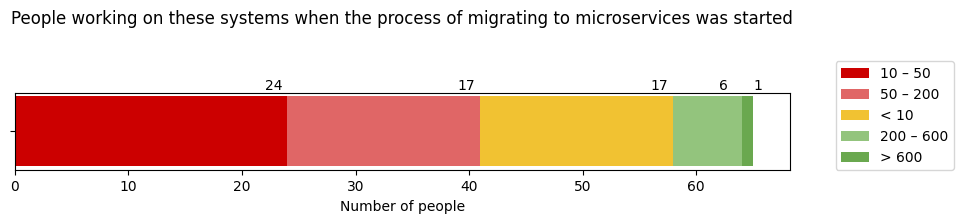

In [58]:
ans = dataset['1.8. Roughly how many people were working on these systems when the process of migrating to microservices was started?'].value_counts().to_dict()

x =[""]

y1 = np.array(list(ans.values())[0])
y2 = np.array(list(ans.values())[1])
y3 = np.array(list(ans.values())[2])
y4 = np.array(list(ans.values())[3])
y5 = np.array(list(ans.values())[4])


mylabels = list(ans.keys())
plt.figure(figsize=(10,1))
plt.barh(x, y1, color='#cc0000', height=0.2)
plt.text(y1-2, 0.12, np.array2string(y1, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y2, left=y1, color='#e06666', height=0.2)
plt.text(y1+y2-2, 0.12, np.array2string(y2, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y3, left=y1+y2, color='#f1c232', height=0.2)
plt.text(y1+y2+y3-2, 0.12, np.array2string(y3, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y4, left=y1+y2+y3, color='#93c47d', height=0.2)
plt.text(y1+y2+y3+y4-2, 0.12, np.array2string(y4, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y5, left=y1+y2+y3+y4, color='#6aa84f', height=0.2)
plt.text(y1+y2+y3+y4+y5, 0.12, np.array2string(y5, precision=2, separator=',',
                      suppress_small=True))
plt.xlabel('Number of people')
plt.title('People working on these systems when the process of migrating to microservices was started', pad=50)
plt.legend(labels=mylabels,  bbox_to_anchor=(1.05, 1.5), loc='upper left')

#2. Strategies and Processes

**Where do you look for guidance when migrating a monolith system to microservices?**

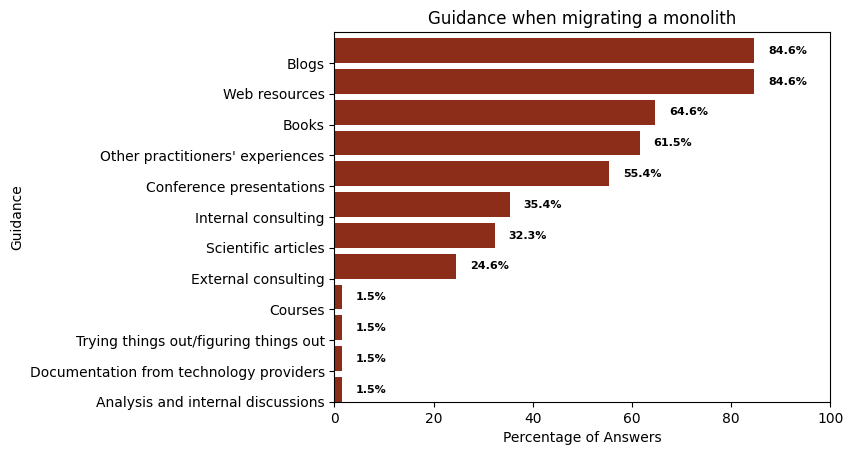

In [43]:
ans = dataset['2.1.  Where do you look for guidance when migrating a monolith system to microservices?\nTick all that apply'].value_counts().to_dict()
new_ans= get_split_by_comma(ans)
new_ans['Courses'] = new_ans['Cursos']
del new_ans['Cursos']
new_ans = dict(sorted(new_ans.items(), key=lambda x:x[1], reverse=False))
new_ans_values = [x/65*100 for x in new_ans.values()]
print_horizontal_graph(new_ans.keys(), new_ans_values, 100, 12,'Percentage of Answers', 'Guidance', 'Guidance when migrating a monolith', True)

**How do you often plan the migration of a monolith to microservices in regards to the evolution of the product?**

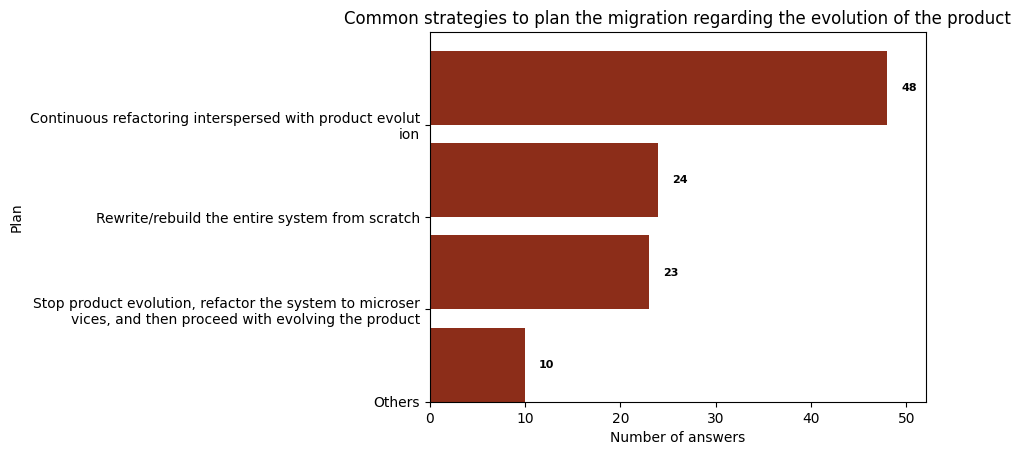

In [44]:
ans = dataset['2.2.  How do you often plan the migration of a monolith to microservices in regards to the evolution of the product?\nTick all that apply'].value_counts().to_dict()
new_ans = dict()
import re
for key, value in ans.items():
  aux = re.findall(r'(?:[^,"]+|"[^"]*")+', key)
  aux = [i.strip() for i in aux]
  aux = [i.replace('"', '') for i in aux]
  for i in aux:
    if i in new_ans:
      new_ans[i] = new_ans[i] + value
    else:

      new_ans[i] = value


final_ans = dict()
final_ans["Others"] = 0

for key, value in new_ans.items():
  if value <= 1:
    final_ans["Others"] = final_ans["Others"] + value
  else:
    final_ans[key] = value

final_ans = sorted(final_ans.items(), key=lambda x:x[1])
final_ans = dict(final_ans)

print_horizontal_graph(final_ans.keys(), final_ans.values(), 52, 4, 'Number of answers', 'Plan', 'Common strategies to plan the migration regarding the evolution of the product')


**How likely are you to consider these data sources when deciding how to decompose a monolith into different services?**

['The output of static analysis tools (e.g., based on source code repository analysis)', 'The output of dynamic analysis tools (e.g., based on runtime data, such as logs or traces)', 'Development process data (e.g., from version-control, project management tools)', 'Software Documentation (e.g., business logic/capabilities/objects, data flow) and related artifacts (e.g., source code, configuration files)']


(0.0, 68.0)

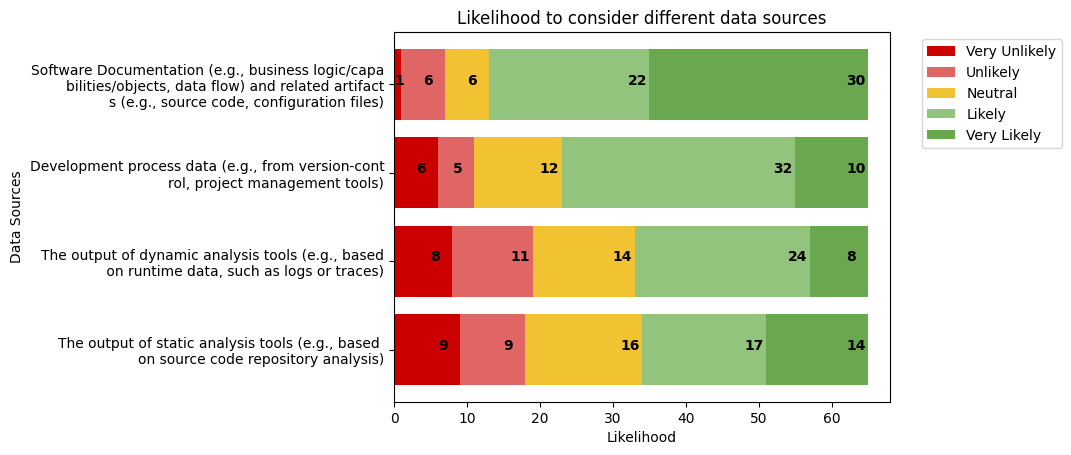

In [45]:
data_source = ['The output of static analysis tools (e.g., based on source code repository analysis)', 'The output of dynamic analysis tools (e.g., based on runtime data, such as logs or traces)', 'Development process data (e.g., from version-control, project management tools)', 'Software Documentation (e.g., business logic/capabilities/objects, data flow) and related artifacts (e.g., source code, configuration files)']
baseline = "2.3. How likely are you to consider these data sources when deciding how to decompose a monolith into different services?  "
val = []
for i in data_source:
    val.append(dataset[baseline + "[" + i + "]"].value_counts().to_dict())

likert_scale = ('Likely', 'Very likely', 'Neutral', 'Very unlikely', 'Unlikely')
values = {}
for i in val:
    for j in set(likert_scale):
        if j in i:
            if j in values: values[j].append(i[j])
            else: values[j] = [i[j]]
        else:
            if j in values: values[j].append(0)
            else: values[j] = [0]


for key, value in values.items():
  values[key] = np.array(value)

y1 = np.array(values['Very unlikely'])
y2 = np.array(values['Unlikely'])
y3 = np.array(values['Neutral'])
y4 = np.array(values['Likely'])
y5 = np.array(values['Very likely'])

print(data_source)
plt.barh(data_source, y1, color='#cc0000')

plt.barh(data_source, y2, left=y1, color='#e06666')
plt.barh(data_source, y3, left=y1+y2, color='#f1c232')
plt.barh(data_source, y4, left=y1+y2+y3, color='#93c47d')
plt.barh(data_source, y5, left=y1+y2+y3+y4, color='#6aa84f')
xlabels_new = [re.sub("(.{49})", "\\1\n", label, 0, re.DOTALL) for label in data_source]
plt.yticks(np.arange(len(xlabels_new)), xlabels_new)

plt.text(y1[0]-3, 0, np.array2string(y1[0], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[0]+y2[0]-3, 0, np.array2string(y2[0], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[0]+y2[0]+y3[0]-3, 0, np.array2string(y3[0], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[0]+y2[0]+y3[0]+y4[0]-3, 0, np.array2string(y4[0], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[0]+y2[0]+y3[0]+y4[0]+y5[0]-3, 0, np.array2string(y5[0], precision=2, separator=',',
                      suppress_small=True), weight='bold')


plt.text(y1[1]-3, 1, np.array2string(y1[1], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[1]+y2[1]-3, 1, np.array2string(y2[1], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[1]+y2[1]+y3[1]-3, 1, np.array2string(y3[1], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[1]+y2[1]+y3[1]+y4[1]-3, 1, np.array2string(y4[1], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[1]+y2[1]+y3[1]+y4[1]+y5[1]-3, 1, np.array2string(y5[1], precision=2, separator=',',
                      suppress_small=True), weight='bold')

plt.text(y1[2]-3,2, np.array2string(y1[2], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[2]+y2[2]-3, 2, np.array2string(y2[2], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[2]+y2[2]+y3[2]-3, 2, np.array2string(y3[2], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[2]+y2[2]+y3[2]+y4[2]-3, 2, np.array2string(y4[2], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[2]+y2[2]+y3[2]+y4[2]+y5[2]-3,2, np.array2string(y5[2], precision=2, separator=',',
                      suppress_small=True), weight='bold')


plt.text(y1[3]-1, 3, np.array2string(y1[3], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[3]+y2[3]-3, 3, np.array2string(y2[3], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[3]+y2[3]+y3[3]-3, 3, np.array2string(y3[3], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[3]+y2[3]+y3[3]+y4[3]-3, 3, np.array2string(y4[3], precision=2, separator=',',
                      suppress_small=True), weight='bold')
plt.text(y1[3]+y2[3]+y3[3]+y4[3]+y5[3]-3, 3, np.array2string(y5[3], precision=2, separator=',',
                      suppress_small=True), weight='bold')



plt.legend(labels=["Very Unlikely", "Unlikely", "Neutral", "Likely", "Very Likely"],  bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.title("Likelihood to consider different data sources")
plt.xlabel("Likelihood")
plt.ylabel("Data Sources")
plt.xlim(0,68)


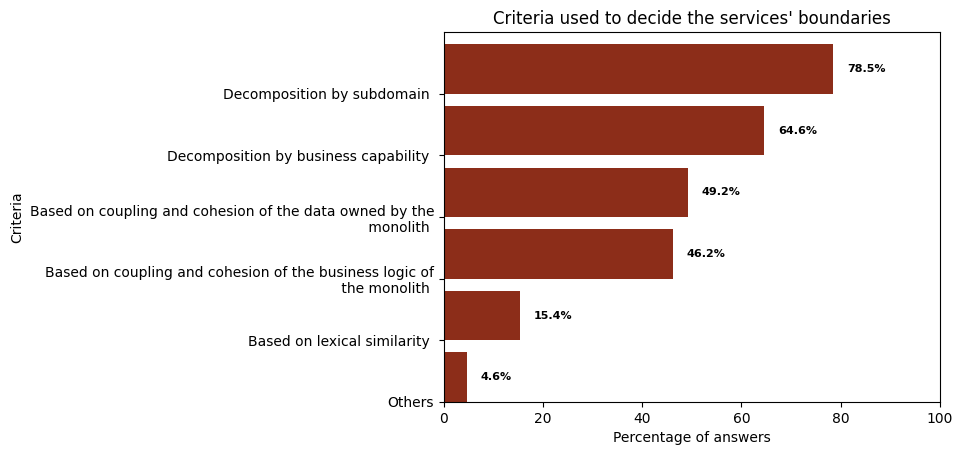

In [46]:
ans = dataset['2.4. Which criteria do you use often for deciding the new service boundaries when decomposing a monolith into different services? \nTick all that apply'].value_counts().to_dict()
new_ans = dict()

import re
for key, value in ans.items():
  rx_comma = re.compile(r",(?![^(]*\))")
  aux = rx_comma.split(key)
  aux = [i.strip() for i in aux]
  for i in aux:
    if i in new_ans:
      new_ans[i] = new_ans[i] + value
    else:
      new_ans[i] = value

final_ans = dict()
final_ans["Others"] = 0

for key, value in new_ans.items():
  if value <= 1:
    final_ans["Others"] = final_ans["Others"] + value
  else:
    final_ans[key] = value

final_ans = sorted(final_ans.items(), key=lambda x:x[1])
final_ans = dict(final_ans)
final_ans_values = [x/65*100 for x in final_ans.values()]
final_ans_keys = [re.sub(r'\([^)]*\)', '', x) for x in final_ans.keys()]

print_horizontal_graph(final_ans_keys, final_ans_values, 100, 6, 'Percentage of answers', 'Criteria', 'Criteria used to decide the services\' boundaries', True, False)


# 3. Tools

**Thinking of the migration from monolith to microservices projects you have been involved in, have you been assisted by any automated or semi-automated tools?**

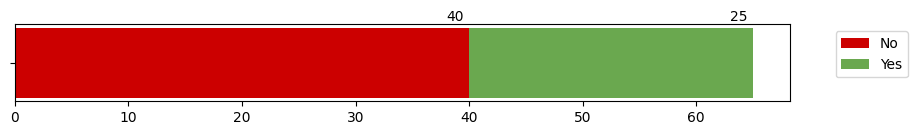

In [47]:
ans = dataset['3.1. Thinking of the migration from monolith to microservices projects you have been involved in, have you been assisted by any automated or semi-automated tools?'].value_counts().to_dict()

x =[""]
y1 = np.array(list(ans.values())[0])
y2 = np.array(list(ans.values())[1])


mylabels = list(ans.keys())
plt.figure(figsize=(10,1))
plt.barh(x, y1, color='#cc0000', height=0.2)
plt.text(y1-2, 0.12, np.array2string(y1, precision=2, separator=',',
                      suppress_small=True))
plt.barh(x, y2, left=y1, color='#6aa84f', height=0.2)
plt.text(y1+y2-2, 0.12, np.array2string(y2, precision=2, separator=',',
                      suppress_small=True))

plt.legend(labels=mylabels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

**In which of these activities would you most appreciate additional tool support?**

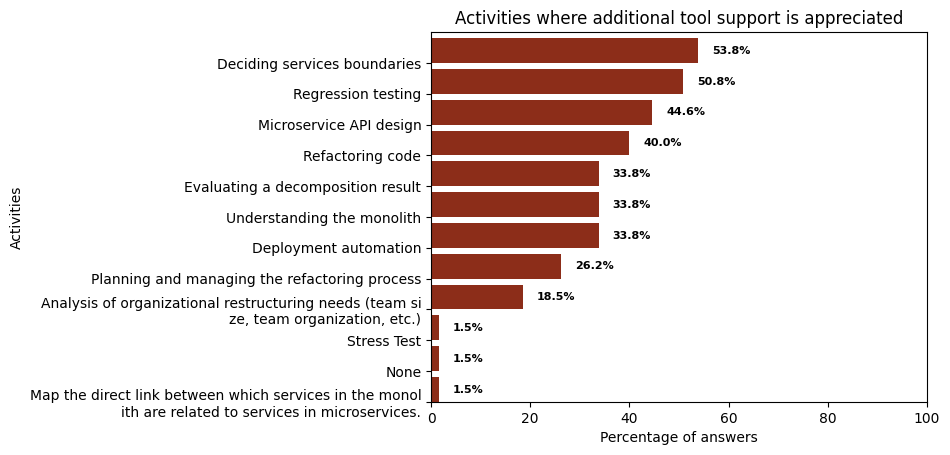

In [48]:
ans = dataset['3.4. In which of these activities would you most appreciate additional tool support?\nTick at most 5 options.'].value_counts().to_dict()
new_ans = dict()
import re
for key, value in ans.items():
  rx_comma = re.compile(r",(?![^(]*\))")
  aux = rx_comma.split(key)
  aux = [i.strip() for i in aux]
  for i in aux:
    if i in new_ans:
      new_ans[i] = new_ans[i] + value
    else: new_ans[i] = value
new_ans = sorted(new_ans.items(), key=lambda x:x[1])
new_ans = dict(new_ans)
new_ans_values = [ x/65*100 for x in new_ans.values()]
print_horizontal_graph(new_ans.keys(), new_ans_values, 100, 12, 'Percentage of answers',  'Activities', 'Activities where additional tool support is appreciated', True)


**What characteristics would you find most important in a tool for refactoring towards a microservice architecture?**

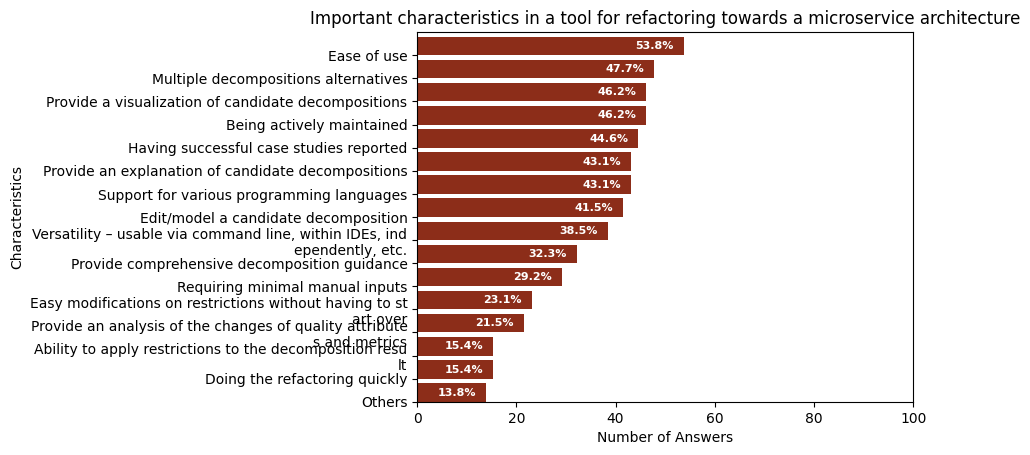

In [49]:
ans = dataset['3.5. What characteristics would you find most important in a tool for refactoring towards a microservice architecture?\nTick at most 8 options.'].value_counts().to_dict()
new_ans = dict()
import re
for key, value in ans.items():
  aux = re.findall(r'(?:[^,"()]+|"[^"]*"|\([^()]*\))+', key)
  aux = [i.strip() for i in aux]
  aux = [i.replace('"', '') for i in aux]
  for i in aux:
    if i in new_ans:
      new_ans[i] = new_ans[i] + value
    else: new_ans[i] = value

final_ans = dict()
final_ans["Others"] = 0

for key, value in new_ans.items():
  if value <= 1:
    final_ans["Others"] = final_ans["Others"] + value
  else:
    final_ans[key] = value

final_ans = sorted(final_ans.items(), key=lambda x:x[1])
final_ans = dict(final_ans)

final_ans_values = [ x/65*100 for x in final_ans.values()]

print_horizontal_graph(final_ans.keys(), final_ans_values, 100, 16,"Number of Answers", 'Characteristics',  'Important characteristics in a tool for refactoring towards a microservice architecture', True, True)


#4. Refactoring Techniques - Splitting the Monolith

(0.0, 68.0)

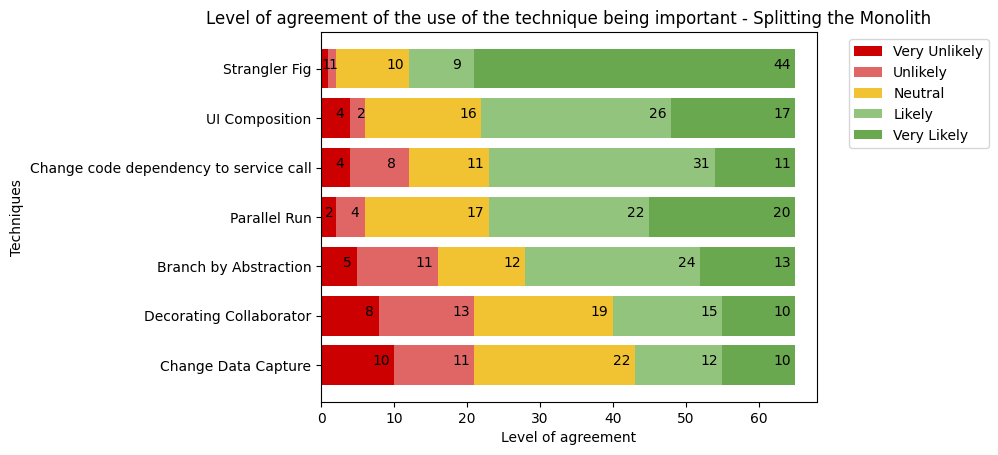

In [60]:
patterns = ['Strangler Fig', 'UI Composition', 'Branch by Abstraction', 'Parallel Run', 'Decorating Collaborator', 'Change Data Capture', 'Change code dependency to service call']
baseline = "4.1. Tell us to which degree you agree with the following statements in the scope of the techniques presented below:\n\n\"In the migration project(s) in which I have been involved the use of this technique was important\" "
val = []
for i in patterns:
    val.append(dataset[baseline + "[" + i + "]"].value_counts().to_dict())

patterns = sorted(patterns, key = lambda x: val[patterns.index(x)]["Strongly Agree"] + val[patterns.index(x)]["Agree"])
val = sorted(val, key= lambda x: x["Strongly Agree"] +  x["Agree"])

likert_scale = ['Agree', 'Strongly Agree', 'Neutral', 'Strongly Disagree', 'Disagree']
values = {}
for i in val:
    for j in set(likert_scale):
        if j in i:
            if j in values: values[j].append(i[j])
            else: values[j] = [i[j]]
        else:
            if j in values: values[j].append(0)
            else: values[j] = [0]

y1 = np.array(values['Strongly Disagree'])
y2 = np.array(values['Disagree'])
y3 = np.array(values['Neutral'])
y4 = np.array(values['Agree'])
y5 = np.array(values['Strongly Agree'])

plt.barh(patterns, y1, color='#cc0000')
plt.barh(patterns, y2, left=y1, color='#e06666')
plt.barh(patterns, y3, left=y1+y2, color='#f1c232')
plt.barh(patterns, y4, left=y1+y2+y3, color='#93c47d')
plt.barh(patterns, y5, left=y1+y2+y3+y4, color='#6aa84f')

plt.text(y1[0]-3, 0, np.array2string(y1[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]-3, 0, np.array2string(y2[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]+y3[0]-3, 0, np.array2string(y3[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]+y3[0]+y4[0]-3, 0, np.array2string(y4[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]+y3[0]+y4[0]+y5[0]-3, 0, np.array2string(y5[0], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[1]-2, 1, np.array2string(y1[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]-3, 1, np.array2string(y2[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]+y3[1]-3, 1, np.array2string(y3[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]+y3[1]+y4[1]-3, 1, np.array2string(y4[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]+y3[1]+y4[1]+y5[1]-3, 1, np.array2string(y5[1], precision=2, separator=',',
                      suppress_small=True))

plt.text(y1[2]-2, 2, np.array2string(y1[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]-3, 2, np.array2string(y2[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]+y3[2]-3, 2, np.array2string(y3[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]+y3[2]+y4[2]-3, 2, np.array2string(y4[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]+y3[2]+y4[2]+y5[2]-3,2, np.array2string(y5[2], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[3]-1.5, 3, np.array2string(y1[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]-2, 3, np.array2string(y2[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]+y3[3]-3, 3, np.array2string(y3[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]+y3[3]+y4[3]-3, 3, np.array2string(y4[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]+y3[3]+y4[3]+y5[3]-3, 3, np.array2string(y5[3], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[4]-2, 4, np.array2string(y1[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]-3, 4, np.array2string(y2[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]+y3[4]-3, 4, np.array2string(y3[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]+y3[4]+y4[4]-3, 4, np.array2string(y4[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]+y3[4]+y4[4]+y5[4]-3, 4, np.array2string(y5[4], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[5]-2, 5, np.array2string(y1[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]-1, 5, np.array2string(y2[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]+y3[5]-3, 5, np.array2string(y3[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]+y3[5]+y4[5]-3, 5, np.array2string(y4[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]+y3[5]+y4[5]+y5[5]-3, 5, np.array2string(y5[5], precision=2, separator=',',
                      suppress_small=True))

plt.text(y1[6]-1, 6, np.array2string(y1[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]-1, 6, np.array2string(y2[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]+y3[6]-3, 6, np.array2string(y3[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]+y3[6]+y4[6]-3, 6, np.array2string(y4[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]+y3[6]+y4[6]+y5[6]-3, 6, np.array2string(y5[6], precision=2, separator=',',
                      suppress_small=True))

plt.title("Level of agreement of the use of the technique being important - Splitting the Monolith")
plt.legend(labels=["Very Unlikely", "Unlikely", "Neutral", "Likely", "Very Likely"],  bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Level of agreement")
plt.ylabel("Techniques")
plt.xlim(0,68)


#5. Refactoring Techniques - Decomposing the Database

(0.0, 68.0)

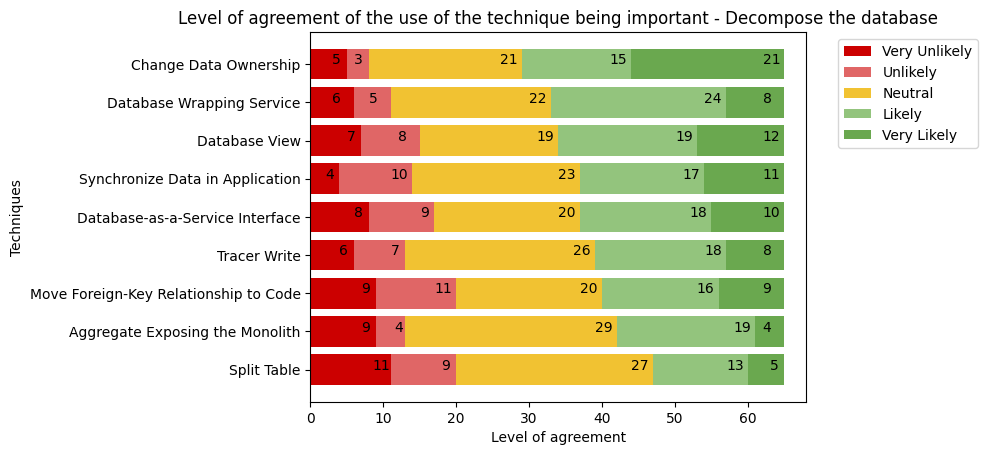

In [61]:
patterns_database = ['Database View', 'Database Wrapping Service', 'Database-as-a-Service Interface', 'Aggregate Exposing the Monolith', 'Change Data Ownership', 'Synchronize Data in Application', 'Tracer Write', 'Split Table', 'Move Foreign-Key Relationship to Code']
baseline_database  = "5.1. Tell us to which degree you agree with the following statements in the scope of the techniques presented below:\n\n\"In the migration project(s) in which I have been involved the use of this technique was important\" "
database_val = []

for i in patterns_database:
    database_val.append(dataset[baseline_database + "[" + i + "]"].value_counts().to_dict())

patterns_database = sorted(patterns_database, key = lambda x: database_val[patterns_database.index(x)]["Strongly Agree"] + database_val[patterns_database.index(x)]["Agree"])
database_val = sorted(database_val, key= lambda x: x["Strongly Agree"] +  x["Agree"])

values_2 = {}
for i in database_val:
    for j in set(likert_scale):
        if j in i:
            if j in values_2: values_2[j].append(i[j])
            else: values_2[j] = [i[j]]
        else:
            if j in values_2: values_2[j].append(0)
            else: values_2[j] = [0]

y1 = np.array(values_2['Strongly Disagree'])
y2 = np.array(values_2['Disagree'])
y3 = np.array(values_2['Neutral'])
y4 = np.array(values_2['Agree'])
y5 = np.array(values_2['Strongly Agree'])

plt.barh(patterns_database, y1, color='#cc0000')
plt.barh(patterns_database, y2, left=y1, color='#e06666')
plt.barh(patterns_database, y3, left=y1+y2, color='#f1c232')
plt.barh(patterns_database, y4, left=y1+y2+y3, color='#93c47d')
plt.barh(patterns_database, y5, left=y1+y2+y3+y4, color='#6aa84f')


plt.text(y1[0]-2.5, 0, np.array2string(y1[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]-2, 0, np.array2string(y2[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]+y3[0]-3, 0, np.array2string(y3[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]+y3[0]+y4[0]-3, 0, np.array2string(y4[0], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[0]+y2[0]+y3[0]+y4[0]+y5[0]-2, 0, np.array2string(y5[0], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[1]-2, 1, np.array2string(y1[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]-1.5, 1, np.array2string(y2[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]+y3[1]-3, 1, np.array2string(y3[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]+y3[1]+y4[1]-3, 1, np.array2string(y4[1], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[1]+y2[1]+y3[1]+y4[1]+y5[1]-3, 1, np.array2string(y5[1], precision=2, separator=',',
                      suppress_small=True))

plt.text(y1[2]-2, 2, np.array2string(y1[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]-3, 2, np.array2string(y2[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]+y3[2]-3, 2, np.array2string(y3[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]+y3[2]+y4[2]-3, 2, np.array2string(y4[2], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[2]+y2[2]+y3[2]+y4[2]+y5[2]-3,2, np.array2string(y5[2], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[3]-2, 3, np.array2string(y1[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]-2, 3, np.array2string(y2[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]+y3[3]-3, 3, np.array2string(y3[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]+y3[3]+y4[3]-3, 3, np.array2string(y4[3], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[3]+y2[3]+y3[3]+y4[3]+y5[3]-3, 3, np.array2string(y5[3], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[4]-2, 4, np.array2string(y1[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]-2, 4, np.array2string(y2[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]+y3[4]-3, 4, np.array2string(y3[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]+y3[4]+y4[4]-3, 4, np.array2string(y4[4], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[4]+y2[4]+y3[4]+y4[4]+y5[4]-3, 4, np.array2string(y5[4], precision=2, separator=',',
                      suppress_small=True))


plt.text(y1[5]-2, 5, np.array2string(y1[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]-3, 5, np.array2string(y2[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]+y3[5]-3, 5, np.array2string(y3[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]+y3[5]+y4[5]-3, 5, np.array2string(y4[5], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[5]+y2[5]+y3[5]+y4[5]+y5[5]-3, 5, np.array2string(y5[5], precision=2, separator=',',
                      suppress_small=True))

plt.text(y1[6]-2, 6, np.array2string(y1[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]-3, 6, np.array2string(y2[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]+y3[6]-3, 6, np.array2string(y3[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]+y3[6]+y4[6]-3, 6, np.array2string(y4[6], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[6]+y2[6]+y3[6]+y4[6]+y5[6]-3, 6, np.array2string(y5[6], precision=2, separator=',',
                      suppress_small=True))

plt.text(y1[7]-3, 7, np.array2string(y1[7], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[7]+y2[7]-3, 7, np.array2string(y2[7], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[7]+y2[7]+y3[7]-3, 7, np.array2string(y3[7], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[7]+y2[7]+y3[7]+y4[7]-3, 7, np.array2string(y4[7], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[7]+y2[7]+y3[7]+y4[7]+y5[7]-3, 7, np.array2string(y5[7], precision=2, separator=',',
                      suppress_small=True))

plt.text(y1[8]-2, 8, np.array2string(y1[8], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[8]+y2[8]-2, 8, np.array2string(y2[8], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[8]+y2[8]+y3[8]-3, 8, np.array2string(y3[8], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[8]+y2[8]+y3[8]+y4[8]-3, 8, np.array2string(y4[8], precision=2, separator=',',
                      suppress_small=True))
plt.text(y1[8]+y2[8]+y3[8]+y4[8]+y5[8]-3, 8, np.array2string(y5[8], precision=2, separator=',',
                      suppress_small=True))

plt.title("Level of agreement of the use of the technique being important - Decompose the database")
plt.legend(labels=["Very Unlikely", "Unlikely", "Neutral", "Likely", "Very Likely"],  bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Level of agreement")
plt.ylabel("Techniques")
plt.xlim(0,68)

# 6. Refactoring Techniques

**6.2. In your opinion, which are the most important challenges faced in the migration process?**

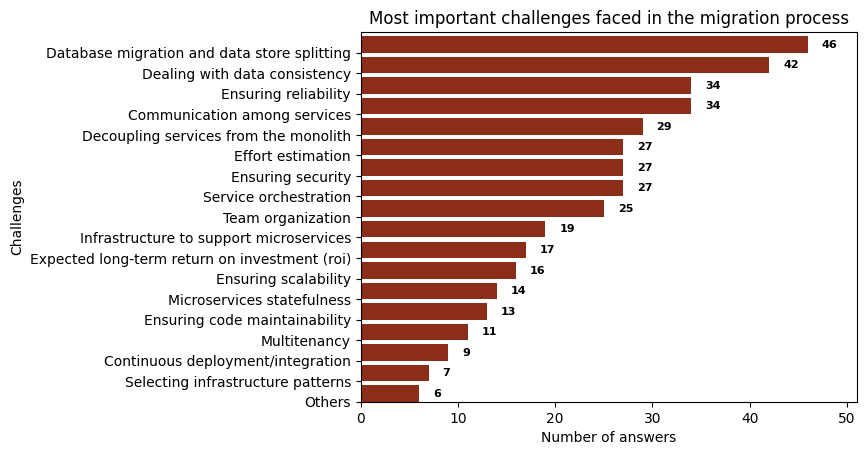

In [52]:
ans = dataset['6.2. In your opinion, which are the most important challenges faced in the migration process?\nTick at most 9 options.'].value_counts().to_dict()
new_ans = get_split_by_comma(ans)
final_ans = dict()
final_ans["Others"] = 0

for key, value in new_ans.items():
  if value <= 1:
    final_ans["Others"] = final_ans["Others"] + value
  else:
    final_ans[key] = value

final_ans = sorted(final_ans.items(), key=lambda x:x[1])
final_ans = dict(final_ans)

print_horizontal_graph(final_ans.keys(), final_ans.values(), 51, 18, 'Number of answers', 'Challenges', 'Most important challenges faced in the migration process')


#7. Evaluation

**7.2. What quality attributes do you assess when evaluating the decomposition result?**

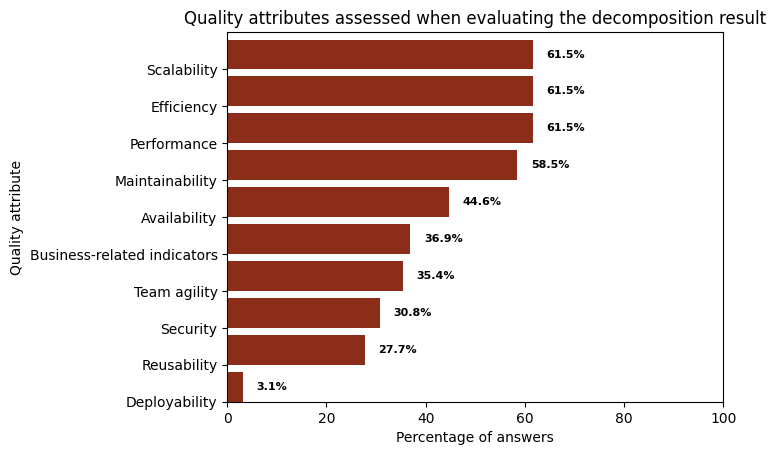

In [53]:
ans = dataset['7.2. What quality attributes do you assess when evaluating the decomposition result?\nTick at most 4 options.'].value_counts().to_dict()
new_ans = get_split_by_comma(ans)
new_ans_values = [x/65*100 for x in new_ans.values()]
print_horizontal_graph(new_ans.keys(), new_ans_values, 100, 10, 'Percentage of answers', 'Quality attribute', 'Quality attributes assessed when evaluating the decomposition result', True)



**7.5. In which environments do you evaluate a decomposition result?**

[Text(0, 5, '49'), Text(0, 5, '42'), Text(0, 5, '38')]

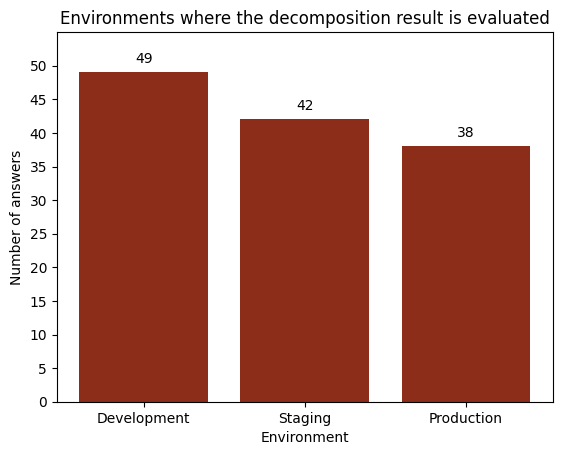

In [54]:
ans = dataset['7.5. In which environments do you evaluate a decomposition result?\nTick all that apply'].value_counts().to_dict()
new_ans = get_split_by_comma(ans, True)

fig, ax = plt.subplots()
width = 0.8 # the width of the bars
x = np.arange(len(new_ans.keys()))
ax.set_xticks(x, labels=new_ans.keys())
ax.set_yticks(np.arange(0, max(new_ans.values()) + 2, step=5))
ax.set(ylabel='Number of answers', xlabel='Environment', title='Environments where the decomposition result is evaluated', ylim=(0,55))
pps = ax.bar(x, new_ans.values(), width, align='center', color ='#8c2d19')
ax.bar_label(pps, padding=5)


**7.6. What kind of inputs do you use to evaluate a decomposition result?**

[Text(0, 5, '50'), Text(0, 5, '38'), Text(0, 5, '37')]

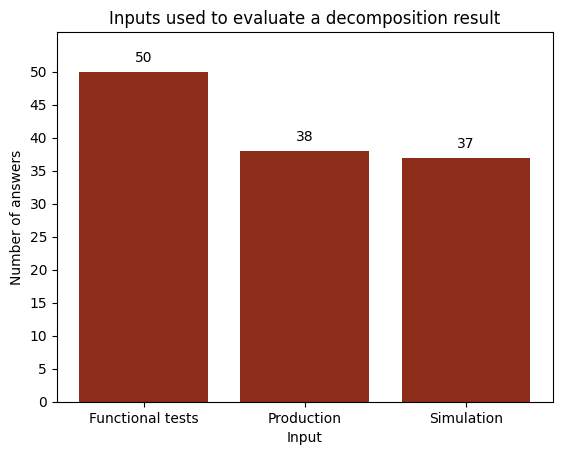

In [55]:
ans = dataset['7.6. What kind of inputs do you use to evaluate a decomposition result?\nTick all that apply'].value_counts().to_dict()
new_ans = get_split_by_comma(ans, True)

fig, ax = plt.subplots()
width = 0.8 # the width of the bars
x = np.arange(len(new_ans.keys()))
ax.set_xticks(x, labels=new_ans.keys())
ax.set_yticks(np.arange(0, max(new_ans.values()) + 2, step=5))
ax.set(ylabel='Number of answers', xlabel='Input', title='Inputs used to evaluate a decomposition result', ylim=(0,56))
pps = ax.bar(x, new_ans.values(), width, align='center', color ='#8c2d19')
ax.bar_label(pps, padding=5)
